# Visualization
This notebook is used for the visualization and summarization of the data.

In [1]:
import sys
sys.path.append('../utils/')
from visualization import *


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import plotly.express as px
import plotly.graph_objects as go


import warnings
warnings.filterwarnings("ignore")


In [2]:
DATA_PATH = '../../data/intermediate/'
IMAGE_PATH = '../../images/visualization/'
PATH_FINAL = '../../data/final/'

## 1. Students

In [3]:
students = pd.read_csv(DATA_PATH+'students.csv', index_col=0)
students.head(3)

,age_end,age_now,age_start,birth_date,citizenship,date_end,date_start,degree,gender,graduated,...,major,major_number,permanent_address,relevance_date,study_length,university,year_of_study,years_for_degree,years_extra,dropout
0,29.0,40.0,23.0,1982.0,NaN,2011.0,2005,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,NaN,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False
1,25.0,32.0,19.0,1990.0,NaN,2015.0,2009,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,NaN,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False
2,25.0,35.0,19.0,1987.0,NaN,2012.0,2006,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,NaN,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False


### 1.1 Graduated majors

,index,major
0,Všeobecné lékařství,10479
1,Zubní lékařství,1912
2,Vojenské všeobecné lékařství,96
3,Vojenské zubní lékařství,3


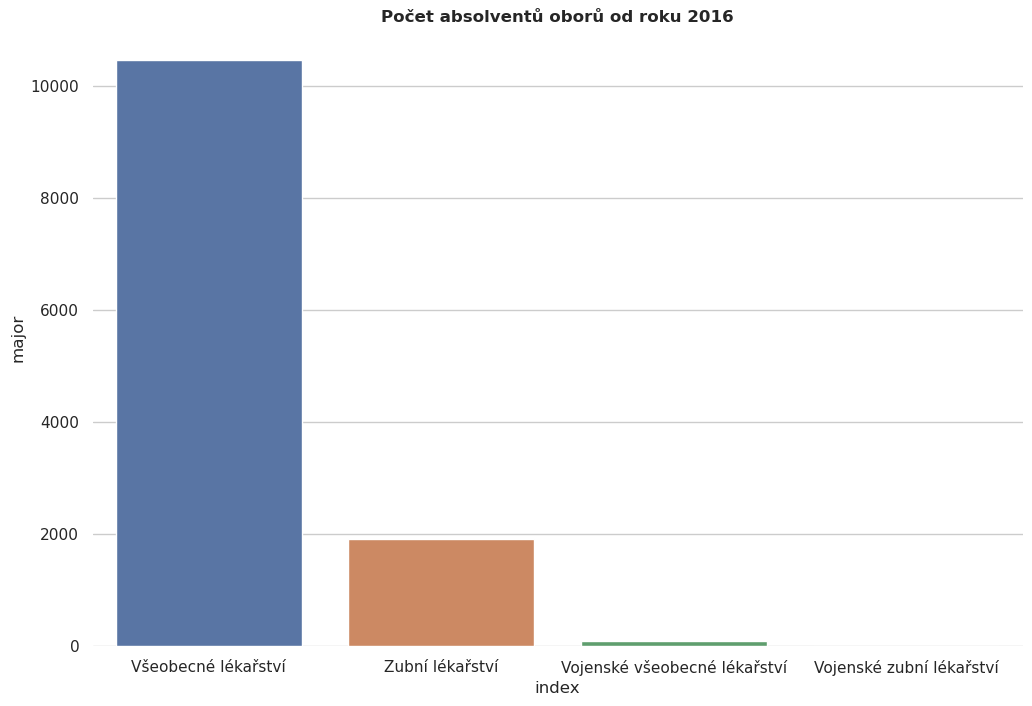

In [16]:
title = 'Počet absolventů oborů od roku 2016'

student_majors = students[(students.graduated == True) & (students.date_end >= 2016)]['major'].value_counts().reset_index()

display(student_majors)
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")

plt.title(title, fontweight="bold")
plt.ylabel('Počet')
plt.xlabel('Obor')

# sns.barplot(student_majors.index, student_majors.values);
sns.barplot(data=student_majors, x="index", y="major")

sns.despine(bottom = True, left = True)

save_plot(title)

In [21]:
students[(students.graduated == True) & (students.date_end >= 2016)].groupby(['date_end','major']).count()

age_end  age_now  age_start  \
date_end major                                                       
2016.0   Vojenské všeobecné lékařství       27       27         27   
         Všeobecné lékařství              1571     1571       1571   
         Zubní lékařství                   362      362        362   
2017.0   Vojenské všeobecné lékařství       18       18         18   
         Všeobecné lékařství              1738     1738       1738   
         Zubní lékařství                   361      361        361   
2018.0   Vojenské všeobecné lékařství       11       11         11   
         Všeobecné lékařství              1638     1638       1638   
         Zubní lékařství                   312      312        312   
2019.0   Vojenské všeobecné lékařství       11       11         11   
         Vojenské zubní lékařství            1        1          1   
         Všeobecné lékařství              1650     1650       1650   
         Zubní lékařství                   293      293        293   
2020.0   Vojenské všeobecné lékařství       22       22         22   
         Vojenské zubní lékařství            2        2          2   
         Všeobecné lékařství              1714     1714       1714   
         Zubní lékařství                   284      284        284   
2021.0   Vojenské všeobecné lékařství        7        7          7   
         Všeobecné lékařství              1710     1710       1710   
         Zubní lékařství                   297      297        297   
2022.0   Všeobecné lékařství                27       27         27   
         Zubní lékařství                     3        3          3   

                                       birth_date  citizenship  date_start  \
date_end major                                                               
2016.0   Vojenské všeobecné lékařství          27           27          27   
         Všeobecné lékařství                 1571          553        1634   
         Zubní lékařství                      362          162         362   
2017.0   Vojenské všeobecné lékařství          18           18          18   
         Všeobecné lékařství                 1738          669        1820   
         Zubní lékařství                      361          165         361   
2018.0   Vojenské všeobecné lékařství          11           11          11   
         Všeobecné lékařství                 1638          588        1710   
         Zubní lékařství                      312          154         312   
2019.0   Vojenské všeobecné lékařství          11           11          11   
         Vojenské zubní lékařství               1            1           1   
         Všeobecné lékařství                 1650          623        1719   
         Zubní lékařství                      293          163         293   
2020.0   Vojenské všeobecné lékařství          22           22          22   
         Vojenské zubní lékařství               2            2           2   
         Všeobecné lékařství                 1714          651        1783   
         Zubní lékařství                      284          146         284   
2021.0   Vojenské všeobecné lékařství           7            7           7   
         Všeobecné lékařství                 1710          625        1786   
         Zubní lékařství                      297          152         297   
2022.0   Všeobecné lékařství                   27           20          27   
         Zubní lékařství                        3            0           3   

                                       degree  gender  graduated  language  \
date_end major                                                               
2016.0   Vojenské všeobecné lékařství      27       0         27        27   
         Všeobecné lékařství             1634     169       1634      1634   
         Zubní lékařství                  362      84        362       362   
2017.0   Vojenské všeobecné lékařství      18       0         18        18   
         Všeobecn

### 1.2 Graduates

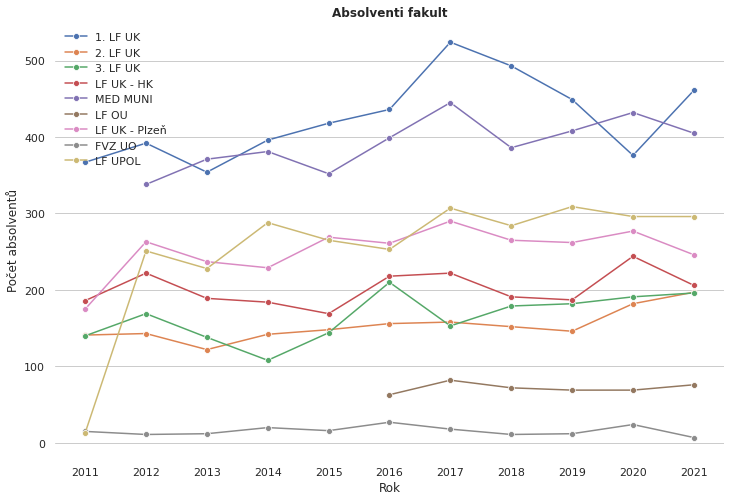

In [5]:
title = 'Absolventi fakult'

graduates = (students[(students.graduated == True) & (students.date_end < 2022)].groupby(['date_end', 'university'])[['degree']]
                                                                                .count()
                                                                                .reset_index())

graduates = graduates.pivot(index=graduates['date_end'], columns='university')['degree']

graduates.columns = ['1. LF UK', '2. LF UK', '3. LF UK', 'LF UK - HK', 'MED MUNI', 'LF OU', 'LF UK - Plzeň', 'FVZ UO', 'LF UPOL']

plt.grid(True, axis='y')
sns.set(rc={'figure.figsize':(16,10)})

for faculty in graduates.columns:
    ax = sns.lineplot(graduates.index, graduates[faculty], label=faculty, marker="o", linewidth = 1.5)
sns.despine(bottom = True, left = True)

plt.xticks(graduates.index)
plt.title(title, fontweight="bold")


ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines

plt.legend(frameon=False)
plt.xlabel('Rok')
plt.ylabel('Počet absolventů');

save_plot(title)
plt.show();

### 1.3 Applicants

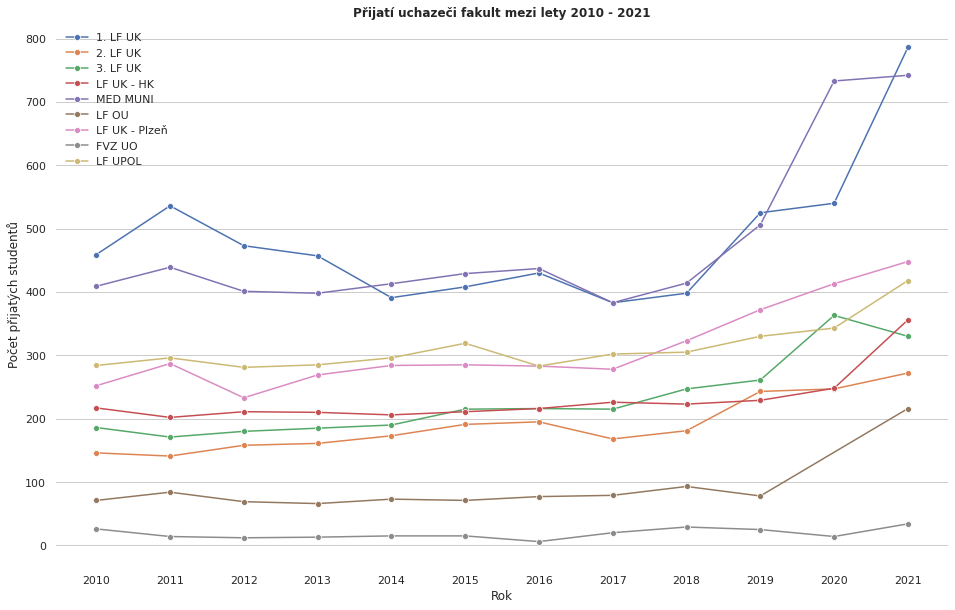

In [6]:

year_last = 2021
year_first = 2010
year_filter = ( year_first<= students.date_start)&(students.date_start <= year_last)
applicants = (students[year_filter].groupby(['date_start', 'university'])[['degree']]
                                                                                .count()
                                                                                .reset_index())

title = f'Přijatí uchazeči fakult mezi lety {year_first} - {year_last}'


sns.set_style("whitegrid")

applicants = applicants.pivot(index=applicants['date_start'], columns='university')['degree']

applicants.columns = ['1. LF UK', '2. LF UK', '3. LF UK', 'LF UK - HK', 'MED MUNI', 'LF OU', 'LF UK - Plzeň', 'FVZ UO', 'LF UPOL']


for faculty in applicants.columns:
    ax = sns.lineplot(applicants.index, applicants[faculty], label=faculty, marker="o")
    
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines
sns.despine(bottom = True, left = True)



plt.xticks(applicants.index)
plt.title(title, fontweight="bold")
plt.xlabel('Rok')
plt.ylabel('Počet přijatých studentů')
plt.legend(frameon=False)


save_plot(title)
plt.show();

### 1.4 Citizenship

citizenship
CZE        57.198325
SVK        26.821469
GBR         2.801675
PRT         1.218120
GER         1.081081
Ostatní    10.879330
Name: degree, dtype: float64


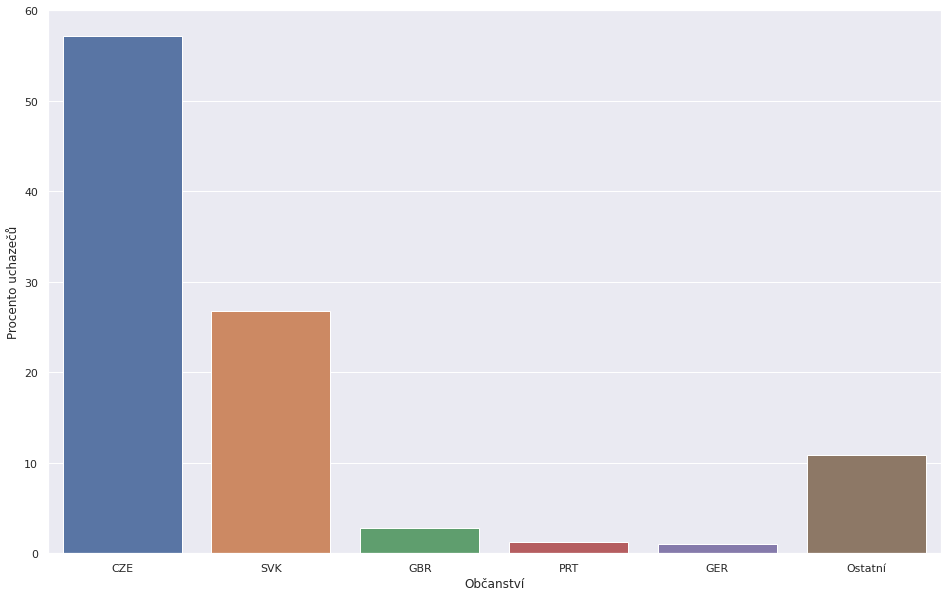

In [7]:
N = 5

title = f'Občanství přijatých uchazečů'
sns.set(rc={'figure.figsize':(16,10)})

citizenship = students.groupby(['citizenship'])['degree'].count()
citizenship = citizenship.sort_values(ascending=False)
citizenship['Ostatní'] = citizenship[N:].sum()
citizenship = citizenship.iloc[[*range(N),-1]]


citizenship = 100*citizenship/sum(citizenship)
print(citizenship)

# def fmt(x):
#     return '{:.1f}%\n({:.0f})'.format(x, citizenship.sum()*x/100)

# plt.pie(citizenship.values,
#         labels=citizenship.index,
#         startangle=90,
#         autopct=fmt,
#         pctdistance=0.8,
#         counterclock=False)
# plt.legend()
# plt.axis('equal')

sns.despine(bottom = True, left = True)
sns.barplot(citizenship.index, citizenship.values);

# plt.title(title, fontweight="bold")
plt.ylabel('Procento uchazečů')
plt.xlabel('Občanství')


save_plot(title)

plt.show()

citizenship
CZE        60.019097
SVK        26.885827
GBR         3.205565
MYS         1.909699
PRT         1.759651
Ostatní     6.220161
Name: graduated, dtype: float64


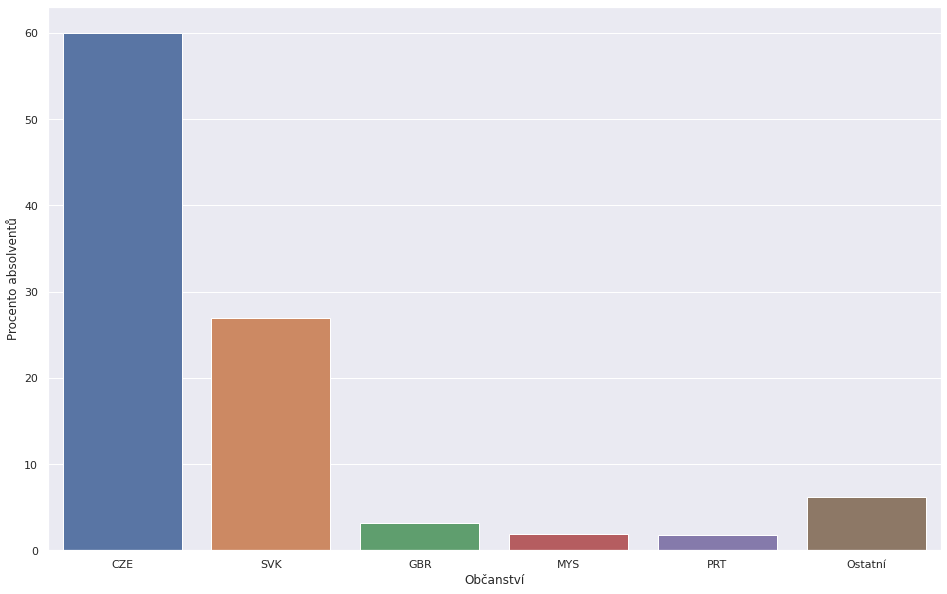

In [8]:
N = 5

title = f'Občanství absolventů'
sns.set(rc={'figure.figsize':(16,10)})

citizenship = students[students.graduated == True].groupby(['citizenship'])['graduated'].count()
citizenship = citizenship.sort_values(ascending=False)
citizenship['Ostatní'] = citizenship[N:].sum()
citizenship = citizenship.iloc[[*range(N),-1]]


citizenship = 100*citizenship/sum(citizenship)
print(citizenship)



sns.despine(bottom = True, left = True)
sns.barplot(citizenship.index, citizenship.values);


# plt.title(title, fontweight="bold")
plt.ylabel('Procento absolventů')
plt.xlabel('Občanství')


save_plot(title)

plt.show()

<Figure size 1600x1000 with 0 Axes>

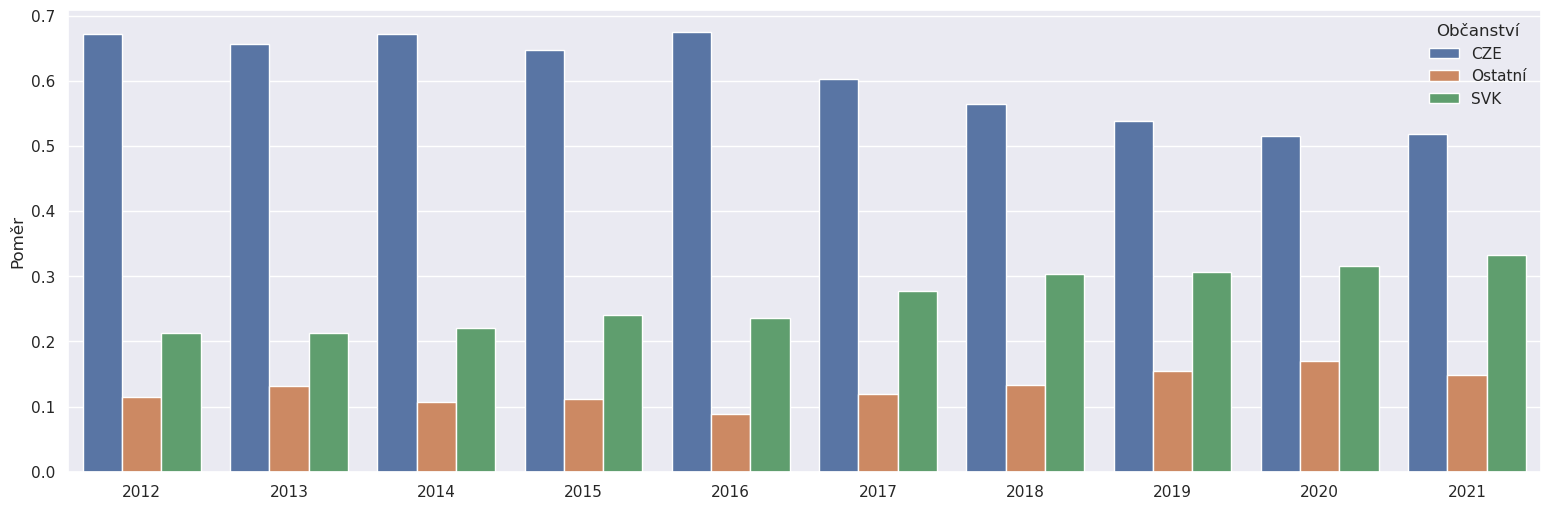

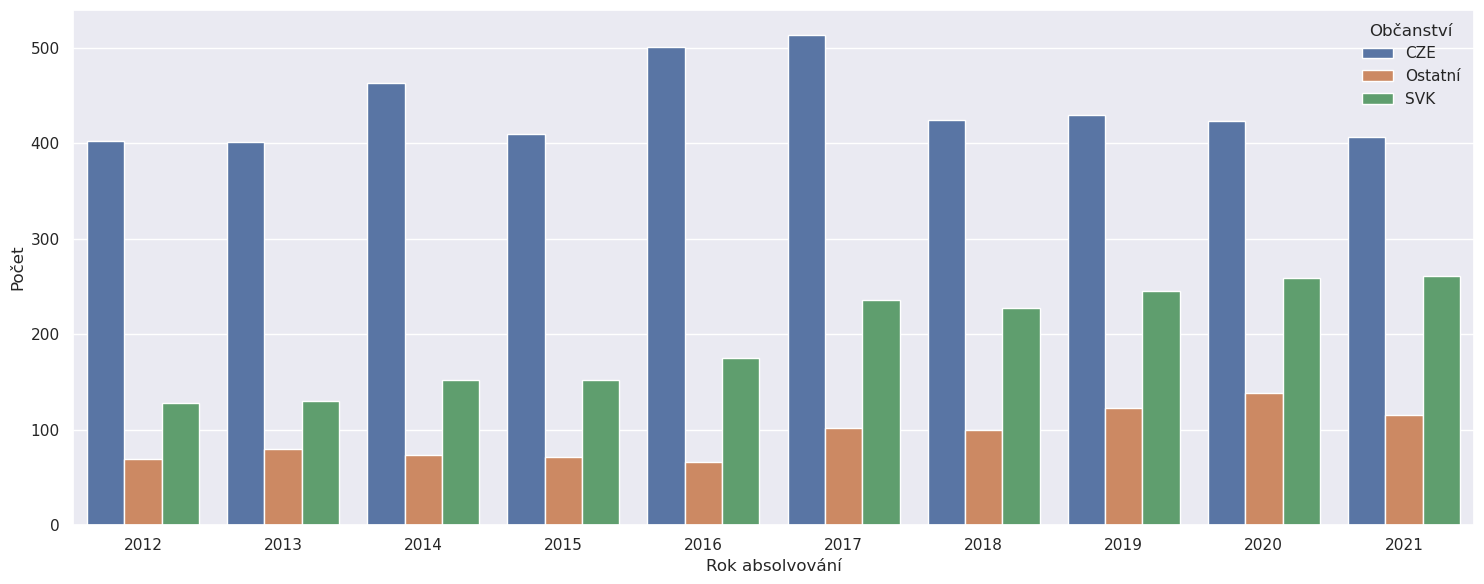

In [204]:
title = f'Občanství absolventů - vývoj'

# sns.set(rc={'figure.figsize':(16,10)})

citizenship = students[(students.graduated == True)
                       & (~students.citizenship.isna())
                       & (students.date_end < 2022)
                       & (students.date_end > 2011)].rename(columns={'graduated': 'count'})
citizenship.date_end = citizenship.date_end.astype(int)
citizenship.loc[~citizenship.citizenship.isin(['CZE', 'SVK']),'citizenship'] = 'Ostatní'

total_cnt = citizenship.groupby(['date_end'])['count'].count().reset_index()
citizenship = citizenship.groupby(['citizenship', 'date_end'])['count'].count().reset_index()


citizenship = pd.merge(citizenship, total_cnt, on='date_end', suffixes=('', '_total'))
citizenship['ratio'] = citizenship['count'] / citizenship['count_total']

sns.despine(left=True, bottom=True, right=False, top=False)

# ax[j][i].set_xlabel('label', fontsize=17, position=(.5,20))
# ax[j][i].set_ylabel('label', fontsize=17)

fig = plt.figure(figsize=(19,6))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# ax = fig.add_subplot(2, 1, 1)
sns.barplot(data=citizenship, x="date_end", y="ratio", hue="citizenship")
plt.ylabel('Poměr')
plt.xlabel('Rok',)
plt.legend(title='Občanství',frameon=False)
plt.show()

fig = plt.figure(figsize=(15,6))
# ax = fig.add_subplot(2, 1, 2)
sns.barplot(data=citizenship, x="date_end", y="count", hue="citizenship")

plt.xlabel('Rok absolvování')
plt.ylabel('Počet')
plt.legend(title='Občanství',frameon=False)
# fig.suptitle('Občanství absolventů', fontsize=20)
fig.tight_layout()


plt.show()



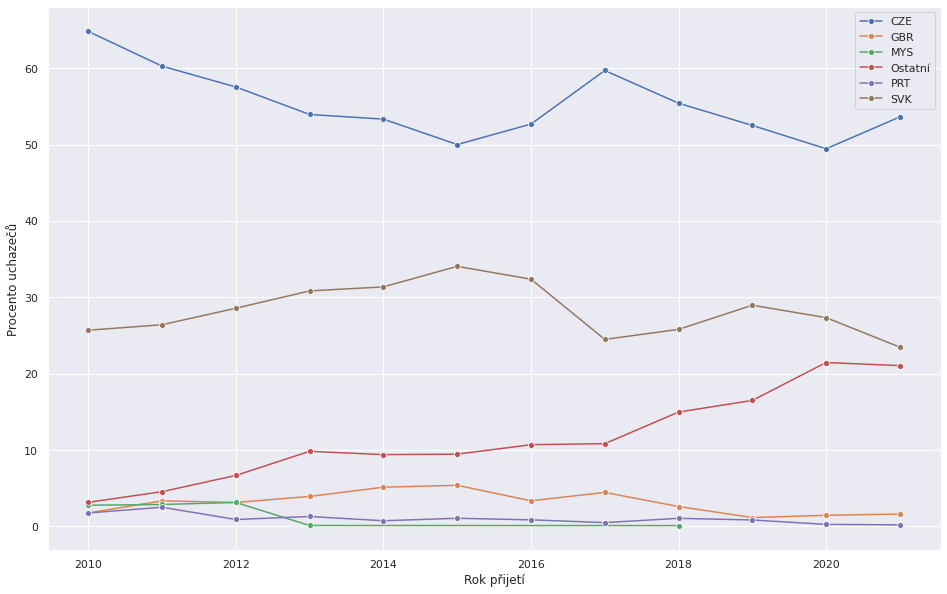

In [9]:
title = f'Vývoj počtu uchazečů'

tmp = students.copy(deep=True)
tmp.loc[(~tmp.citizenship.isin(citizenship.index)) & (~tmp.citizenship.isna()),'citizenship'] = 'Ostatní'
tmp = tmp[(tmp.date_start >= 2010)&(tmp.date_start <= 2021)]
tmp = tmp.groupby(['citizenship','date_start'])['graduated'].count().reset_index()


# students
n_students = tmp.groupby(by='date_start').sum().reset_index()
n_students.columns = ['date_start', 'total']
perc_students = pd.merge(tmp, n_students)
perc_students['perc'] = 100 * perc_students['graduated'] / perc_students['total'] 


for i in tmp.citizenship.unique():
    sns.lineplot(perc_students.date_start, perc_students[perc_students.citizenship == i].perc, label=i, marker="o")
    
    
plt.ylabel('Procento uchazečů')
plt.xlabel('Rok přijetí')
save_plot(title)

plt.show()

### 1.5 Language

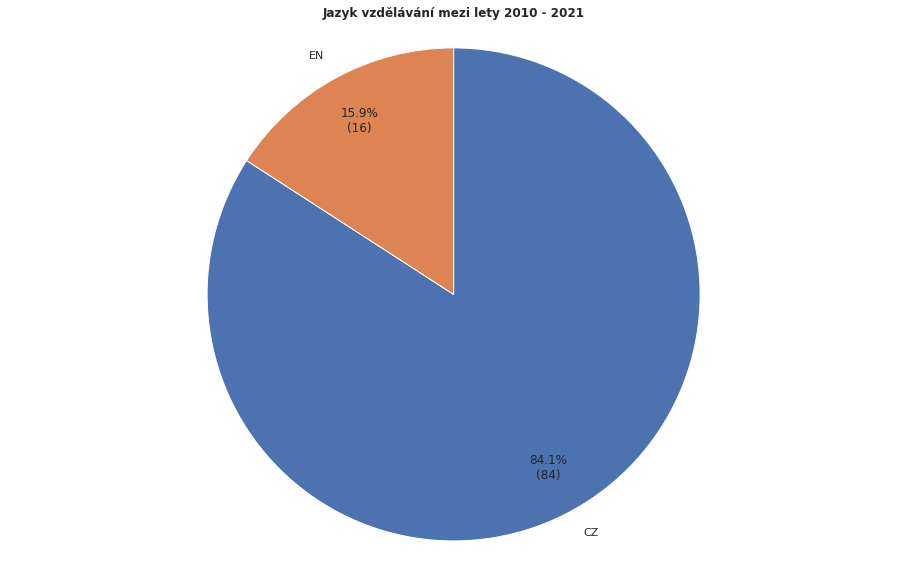

In [10]:
language = students[year_filter].groupby('language')['graduated'].count()

def fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, citizenship.sum()*x/100)

plt.pie(language.values,
        labels=language.index,
        startangle=90,
        autopct=fmt,
        pctdistance=0.8,
        counterclock=False)

# plt.legend()
plt.axis('equal')
plt.title(f'Jazyk vzdělávání mezi lety {year_first} - {year_last}', fontweight="bold")
plt.show()

### 1.6 Age

In [4]:
print(f'Avg age end: {np.nanmean(students[students.graduated == True].age_end)}')
print(f'Avg age end: {np.nanmean(students.age_start)}')

Avg age end: 26.856416645900822
Avg age end: 20.796480855855854


Všeobecné lékařství


,age_end
count,16586.000000
mean,27.040516
std,2.763459
min,18.000000
25%,25.000000
50%,26.000000
75%,29.000000
max,67.000000


Zubní lékařství


,age_end
count,3306.000000
mean,25.955233
std,2.940837
min,19.000000
25%,24.000000
50%,25.000000
75%,27.000000
max,55.000000


Vojenské všeobecné lékařství


,age_end
count,168.000000
mean,26.452381
std,1.451035
min,25.000000
25%,26.000000
50%,26.000000
75%,27.000000
max,33.000000


Vojenské zubní lékařství


,age_end
count,5.000000
mean,25.600000
std,1.140175
min,24.000000
25%,25.000000
50%,26.000000
75%,26.000000
max,27.000000


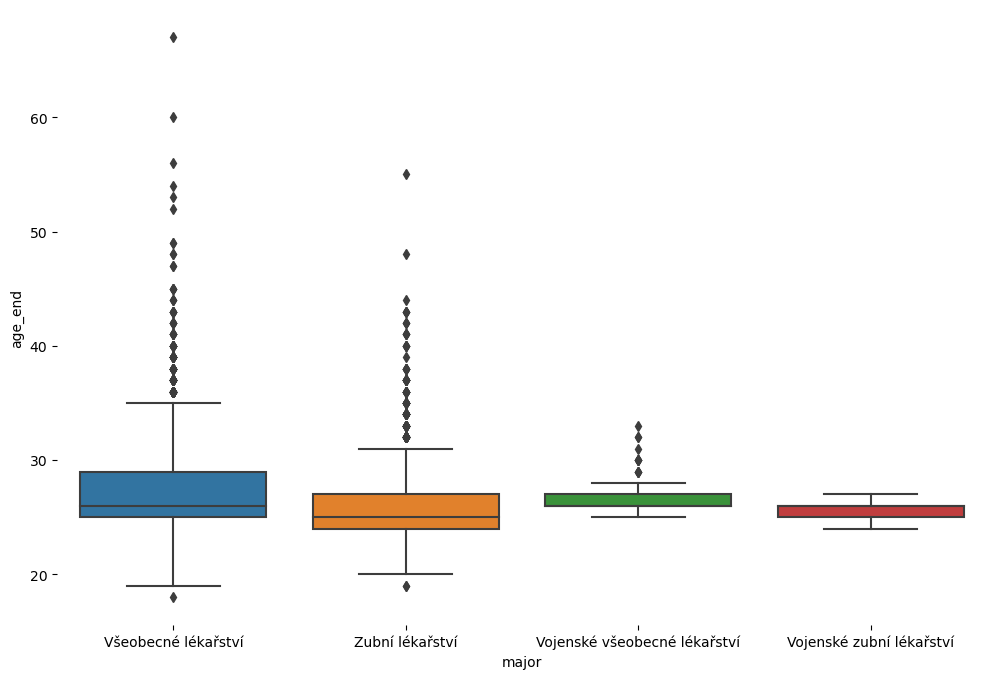

In [4]:
dr = students[students['graduated'] == True][['graduated', 'major', 'age_end']]

for major in dr.major.unique():
    print(major)
    display(dr[dr.major == major].describe())
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="major", y="age_end", data=dr)
sns.despine(bottom = True, left = True)
plt.show()


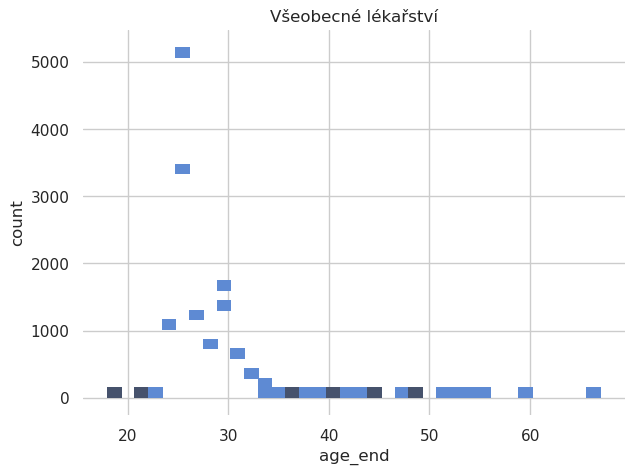

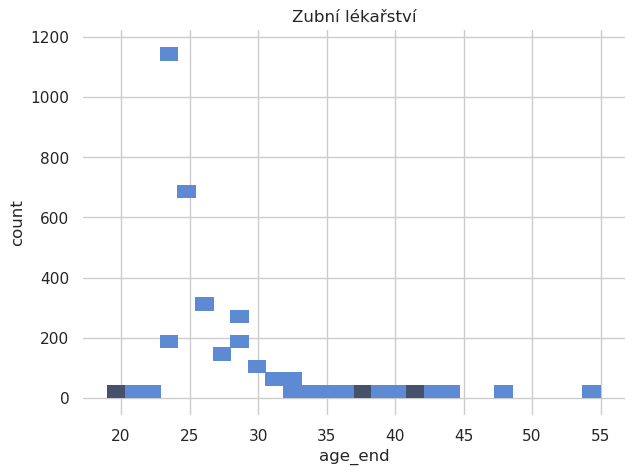

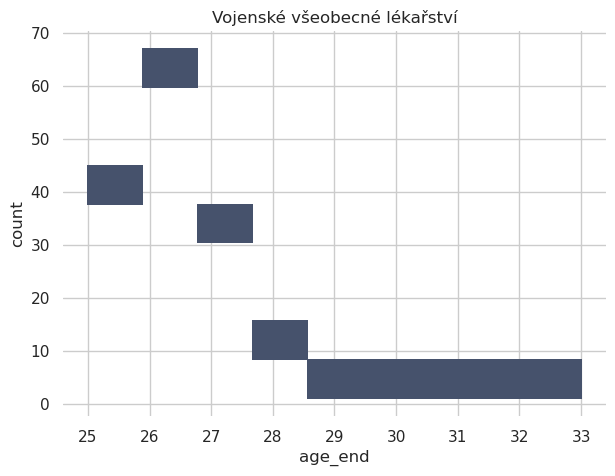

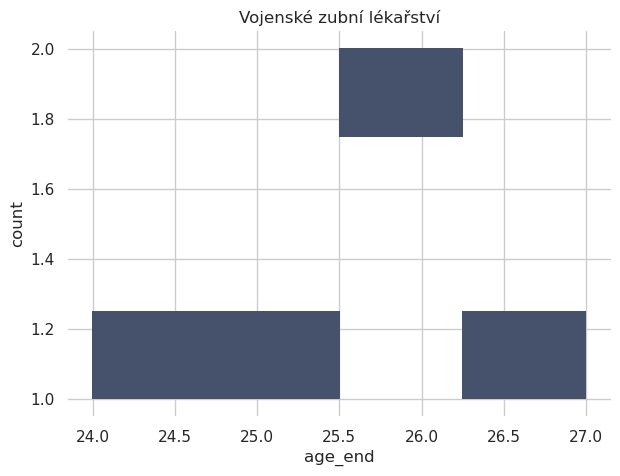

In [178]:
dr = students[students['graduated'] == True][['major', 'age_end']]

for major in dr.major.unique():
    plt.figure(figsize=(7,5))
    dr_cnt = dr[dr.major == major].groupby('age_end').count().reset_index()
    # display(dr_cnt)
    sns.histplot(x=dr_cnt.age_end, y=dr_cnt.major, bins=dr_cnt.shape[0])
    plt.title(major)
    plt.ylabel('count')
    plt.xlabel('age_end')
    sns.despine(bottom = True, left = True)
    plt.show()


### 1.7 Study length

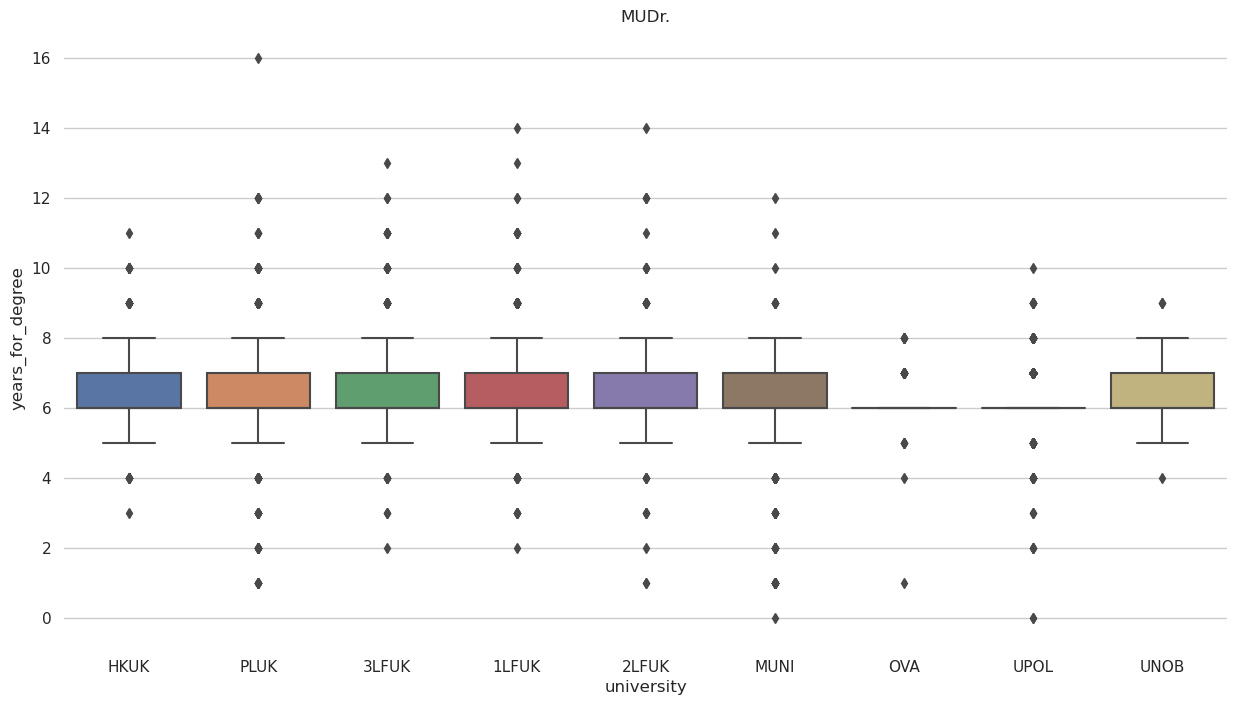

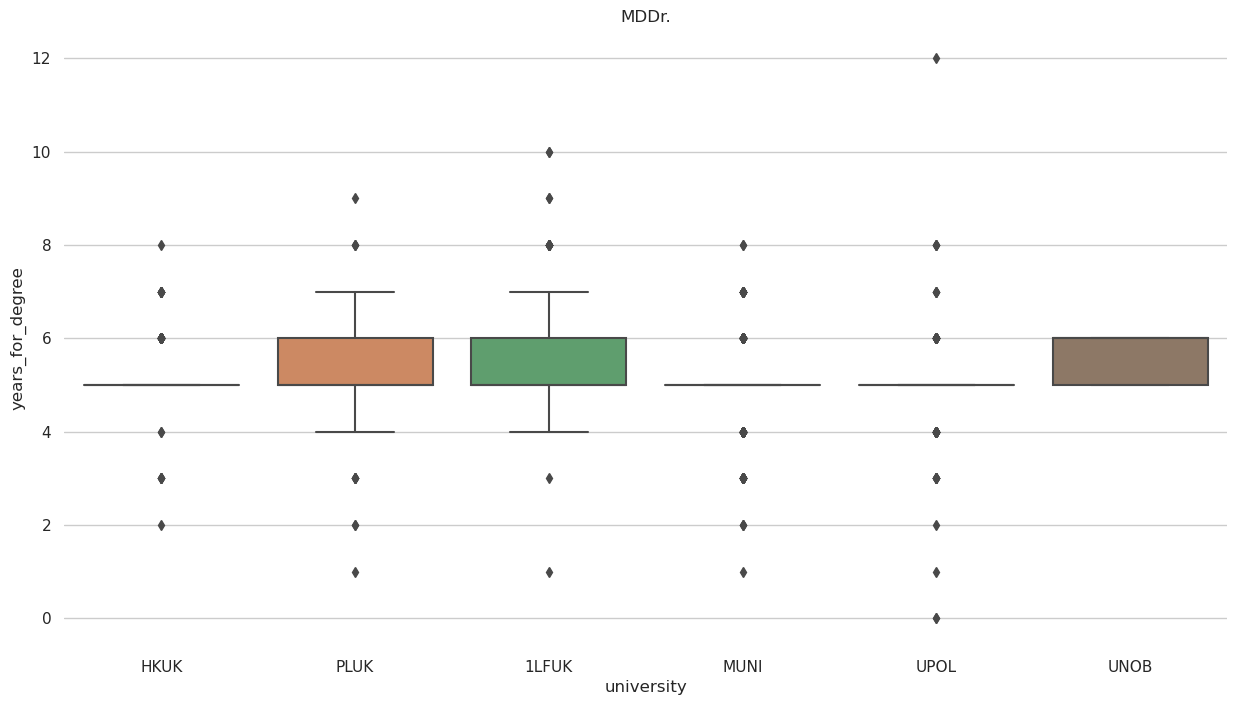

In [170]:
for degree in students['degree'].unique():
    dr = students[students['degree'] == degree]

    ax = sns.boxplot(x="university", y="years_for_degree", data=dr)
    plt.title(degree)
    sns.despine(bottom = True, left = True)
    plt.show()

In [5]:
study_length_info(students)

Průměrná délka studia k získání titulu MUDR.: 6.33 let (počet ročníků studia: 6.0)
Podle fakult:
   - HKUK: 6.36 let (prodlužovalo: 27.86 %)
   - PLUK: 6.4 let (prodlužovalo: 33.8 %)
   - 3LFUK: 6.41 let (prodlužovalo: 29.45 %)
   - 1LFUK: 6.45 let (prodlužovalo: 37.3 %)
   - 2LFUK: 6.4 let (prodlužovalo: 34.91 %)
   - MUNI: 6.17 let (prodlužovalo: 25.6 %)
   - OVA: 6.06 let (prodlužovalo: 6.96 %)
   - UPOL: 6.14 let (prodlužovalo: 16.09 %)
   - UNOB: 6.39 let (prodlužovalo: 34.52 %)
--------------------------------------------------------------------------------
Průměrná délka studia k získání titulu MUDR.: 5.12 let (počet ročníků studia: 5.0)
Podle fakult:
   - HKUK: 5.16 let (prodlužovalo: 16.55 %)
   - PLUK: 5.25 let (prodlužovalo: 27.85 %)
   - 1LFUK: 5.3 let (prodlužovalo: 25.87 %)
   - MUNI: 4.97 let (prodlužovalo: 16.3 %)
   - UPOL: 4.99 let (prodlužovalo: 5.25 %)
   - UNOB: 5.6 let (prodlužovalo: 60.0 %)
-------------------------------------------------------------------------

,Fakulta,Průměrná délka studia,Prodloužení studia (%)
0,HKUK,6.36,27.86
1,PLUK,6.40,33.80
2,3LFUK,6.41,29.45
3,1LFUK,6.45,37.30
4,2LFUK,6.40,34.91
5,MUNI,6.17,25.60
6,OVA,6.06,6.96
7,UPOL,6.14,16.09
8,UNOB,6.39,34.52
9,HKUK,5.16,16.55


### 1.8 Average age during graduation

In [169]:
# graduated = students[(students.graduated == True) & (students.date_end < 2022)][['date_end', 'age_end']]
# graduated_med = graduated.groupby(['date_end']).median()
# graduated_mean = graduated.groupby(['date_end']).mean()#.reset_index()

# display(graduated.groupby(['date_end']).agg(pd.Series.mode))
# display(graduated_med)
# display(graduated_mean)

# sns.set_style('whitegrid')
# plt.grid(True, axis='y')
# ax = sns.lineplot(graduated_mean, marker="o")

# plt.ylim(20,30)
# sns.despine(bottom = True, left = True)

# ax.yaxis.grid(True) # Hide the horizontal gridlines
# ax.xaxis.grid(False) # Show the vertical gridlines
    
# # plt.ylabel('Procento uchazečů')
# # plt.xlabel('Rok přijetí')
# # save_plot(title)

# plt.show()

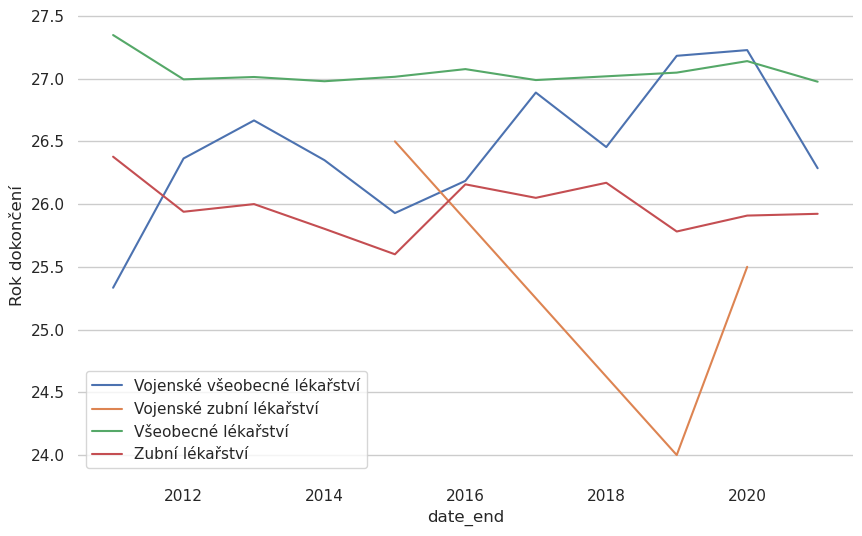

In [168]:
fig, ax = plt.subplots(figsize=(10,6))


x = students[(students.graduated==True)
                & (students.date_end < 2022)].groupby(['major', 'date_end']).mean()['age_end'].reset_index()



sns.set_style('whitegrid')

for major in x.major.unique():
    y = x[x.major == major]
    ax = y.plot(ax=ax, x='date_end', y='age_end',label=major)

sns.despine(bottom = True, left = True)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines

plt.legend()
plt.ylabel('Průměrný věk absolventa')
plt.ylabel('Rok dokončení')
plt.show()

## 2. IC

In [9]:
ic = pd.read_feather(DATA_PATH+'insurance_companies.ftr').drop(columns=['index'])

In [10]:
ic[['expertise', 'year', 'count']].groupby(by=['expertise', 'year']).sum().sort_values('count').tail(20)

count
expertise year           
XNA       2015   37689761
          2016   37896299
          2017   38136081
          2018   38407574
913       2019   41030378
XNA       2021   42876613
913       2021   46502403
XNA       2020   50786298
          2019   52228009
913       2020   53283336
801       2021  106315362
          2012  117026949
          2013  118035334
          2014  120886025
          2015  123050844
          2020  125187118
          2016  127140610
          2017  128529698
          2018  131344908
          2019  135765030

In [18]:
pharmacy = ic[(ic.insurance_company == 'VZP') & (ic.procedure_code == 9552)].groupby(by='year').sum()[['count']].reset_index()
pharmacy.columns = ['Rok', 'Počet']
pharmacy

,count,facilities_id,procedure_code
year,,,
2015,37693090,0.0,38208.0
2016,37896299,0.0,28656.0
2017,38136081,0.0,28656.0
2018,38407574,0.0,28656.0
2019,52228009,0.0,28656.0
2020,50786298,0.0,28656.0
2021,42876613,0.0,28656.0


## 3. Doctors

In [8]:
students = pd.read_csv(PATH_FINAL+'students.csv', index_col=0)
doctors = pd.read_csv(PATH_FINAL+'doctors_all.csv', index_col=0)

### 3.1 New doctors / Graduate students ratio

D/S ratio mean: 0.7724026578898342


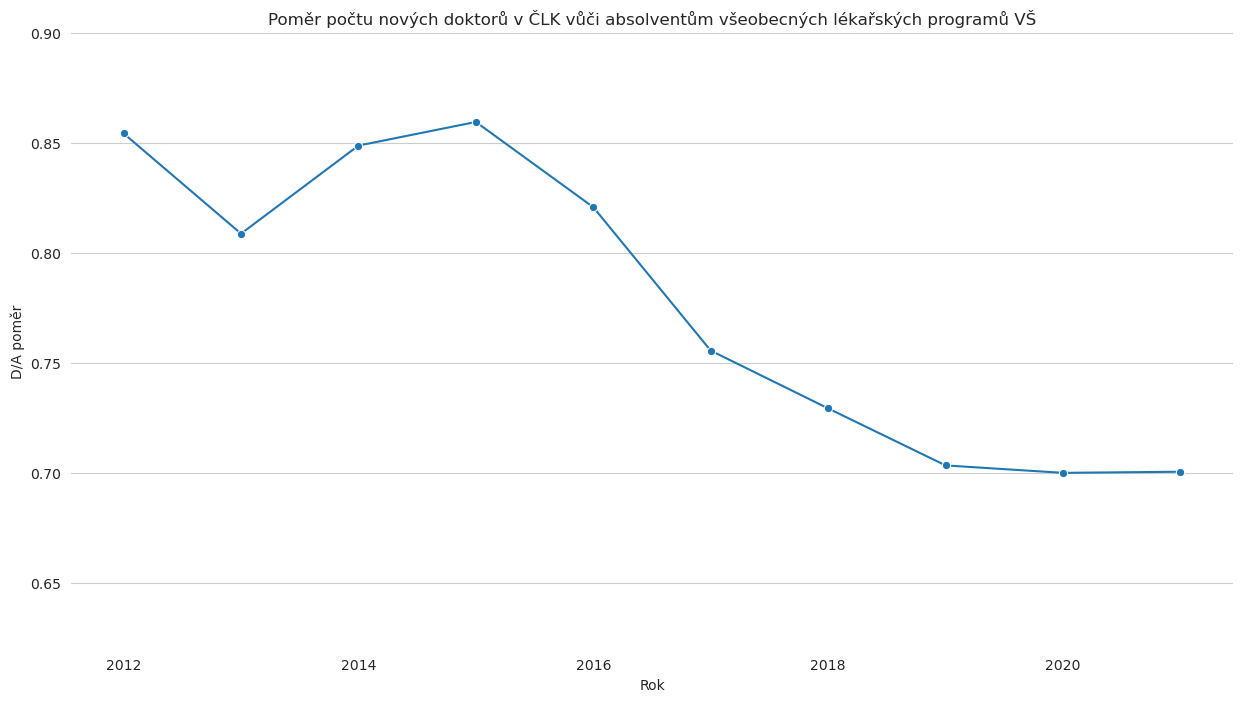

,year,new_docs,graduated,D/S_ratio
2,2012.0,1295,1516,0.854222
9,2013.0,1065,1317,0.808656
8,2014.0,1178,1388,0.848703
6,2015.0,1229,1430,0.859441
1,2016.0,1341,1634,0.820685
0,2017.0,1375,1820,0.755495
5,2018.0,1247,1710,0.729240
7,2019.0,1209,1719,0.703316
4,2020.0,1248,1783,0.699944
3,2021.0,1251,1786,0.700448


In [15]:
title = 'Poměr počtu nových doktorů v ČLK vůči absolventům všeobecných lékařských programů VŠ'
dr = students[(students['graduated'] == True)\
                & (students.major == 'Všeobecné lékařství')\
                & (students.date_end < 2022)\
                & (students.date_end > 2011)][['graduated', 'date_end']]
                
finished_students = dr.groupby('date_end').count().reset_index()
finished_students.columns = ['year', 'graduated']
new_docs = doctors[doctors.graduated_year < 2022].graduated_year.value_counts().reset_index()
new_docs.columns = ['year', 'new_docs']
docs_students = pd.merge(new_docs, finished_students)
docs_students['D/S_ratio'] = docs_students['new_docs']/docs_students['graduated']


sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
plt.grid(True, axis='y')
ax = sns.lineplot(y=docs_students['D/S_ratio'], x=docs_students['year'], marker="o", linewidth = 1.5)
sns.despine(bottom = True, left = True)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines

plt.title(title)
plt.xlabel('Rok')
plt.ylabel('D/A poměr')
plt.ylim(.62, .9)

print(f"D/S ratio mean: {docs_students['new_docs'].sum()/docs_students['graduated'].sum()}")
plt.show();
docs_students.sort_values('year')

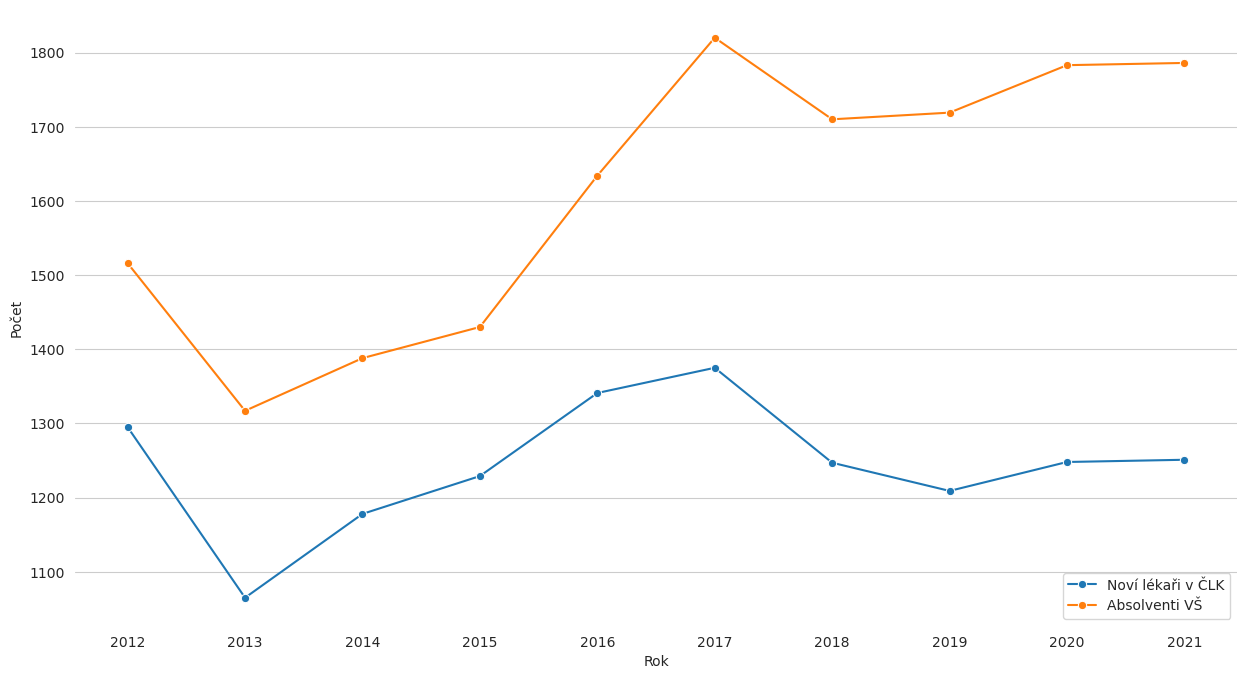

In [63]:
sns.set_style('whitegrid')

plt.figure(figsize=(15, 8))
plt.grid(True, axis='y')

ax = sns.lineplot(y=new_docs[new_docs.year > 2011]['new_docs'], x=new_docs[new_docs.year > 2011]['year'], marker="o", linewidth = 1.5, label='Noví lékaři v ČLK')
ax = sns.lineplot(y=finished_students['graduated'], x=finished_students['year'], marker="o", linewidth = 1.5, label='Absolventi VŠ')

sns.despine(bottom = True, left = True)

plt.xticks(range(2012,2022))

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines

# plt.title('Všeobecné lékařsví a ČLK')
plt.xlabel('Rok')
plt.ylabel('Počet')
# plt.xlim(2011, 2022)
# plt.ylim(999, 2001)
plt.legend(loc='lower right')
plt.show();

In [63]:
print(f'Počet nových doktorů mezi lety 2012-2016: {docs_students[(docs_students.year < 2017)].new_docs.sum()}')
print(f'Poměr D/A lety 2012-2016: {docs_students[(docs_students.year < 2017)].new_docs.sum()/docs_students[(docs_students.year < 2017)].graduated.sum()}')
print(f'Počet nových doktorů mezi lety 2017-2021: {docs_students[(docs_students.year >= 2017)].new_docs.sum()}')
print(f'Poměr D/A lety 2017-2021: {docs_students[(docs_students.year >= 2017)].new_docs.sum()/docs_students[(docs_students.year >= 2017)].graduated.sum()}')

Počet nových doktorů mezi lety 2012-2016: 6108
Poměr D/A lety 2012-2016: 0.8384351407000686
Počet nových doktorů mezi lety 2017-2021: 6330
Poměr D/A lety 2017-2021: 0.7178498525742799


### 3.2 Medical specialty based on the age

In [29]:
doctors_no_na

,age_estimate,medical_specialty
_id,,
1128632159,62.0,pediatrie
5132016162,59.0,oftalmologie
1139949170,52.0,psychiatrie
1139949170,52.0,psychiatrie
1149475179,44.0,anesteziologie a intenzivní medicína
...,...,...
1149321179,43.0,gastroenterologie
5136017166,57.0,psychiatrie
1129614160,71.0,ortopedie a traumatologie pohybového ústrojí


In [28]:
import ast

doctors = pd.read_csv(PATH_FINAL+'doctors_all.csv', index_col=0)
doctors_no_na = doctors[(~doctors.graduated_year.isna())
                        & (~doctors.workplace_name.isna())
                        & (~doctors.medical_specialty.isna())
                        & (doctors.medical_specialty != '[]')
                        & (doctors.n_workplaces > 0)
                        & (doctors.age_estimate <= 80)][['age_estimate', 'medical_specialty']]
doctors_no_na.medical_specialty = doctors_no_na.medical_specialty.apply(ast.literal_eval)
doctors_no_na = doctors_no_na.explode('medical_specialty')

In [30]:
# only 50+ doctors
doctors_more_vc = doctors_no_na.medical_specialty.value_counts()

doctors_more = doctors_no_na[doctors_no_na.medical_specialty.isin(doctors_more_vc[doctors_more_vc > 50].index)]

In [31]:
N = doctors_no_na.medical_specialty.nunique()     # Number of boxes

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(120, 0, N)]


# Sort medical specialties by age
med_specialties = doctors_no_na.groupby('medical_specialty')['age_estimate'].mean()
med_specialties_sorted = med_specialties.sort_values().index

# Compute age mean
mean_age = doctors_no_na.age_estimate.mean()
optimal_mean_age = (65 + students[students.graduated == True].age_end.mean())/2

# Each box is represented by a dict that contains the data, the type, and the colour.
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
fig = go.Figure(data=[go.Box(
    y=doctors_no_na[doctors_no_na.medical_specialty == ms].age_estimate.to_list(),
    marker_color=c[i],
    name=f'{ms} ({len(doctors_no_na[doctors_no_na.medical_specialty == ms])}) '
    ) for i, ms in enumerate(med_specialties_sorted)])

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
    autosize=False,
    width=2000,
    height=800,
    showlegend=False,
)
fig.update_xaxes(tickangle=-90)


# Real age mean
fig.layout.xaxis2 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
fig.add_scatter(x = [0, 2], y = [mean_age, mean_age], mode='lines', xaxis='x2',
                            showlegend=False, line=dict(dash='dash', color = "firebrick", width = 2))
fig.add_annotation(x=N+1, y=mean_age,
            text="Průměrný věk",
            showarrow=False,
            yshift=10)

# Optimal age mean
fig.layout.xaxis3 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
fig.add_scatter(x = [0, 2], y = [optimal_mean_age, optimal_mean_age], mode='lines', xaxis='x3',
                            showlegend=False, line=dict(dash='dash', color = "green", width = 2))
fig.add_annotation(x=N+1, y=optimal_mean_age,
            text="Ideální průměrný věk",
            showarrow=False,
            yshift=10)

fig.layout.xaxis4 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
fig.add_scatter(x = [0, 2], y = [65, 65], mode='lines', xaxis='x4',
                            showlegend=False, line=dict(dash='dash', color = "gray", width = 2))
fig.add_annotation(x=N+1, y=65,
            text="Důchodový věk",
            showarrow=False,
            yshift=10)

fig.show()

fig.write_html(IMAGE_PATH+"medical_specialty.html")



In [32]:
N = doctors_more.medical_specialty.nunique()     # Number of boxes

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(120, 0, N)]


# Sort medical specialties by age
med_specialties = doctors_more.groupby('medical_specialty')['age_estimate'].mean()
med_specialties_sorted = med_specialties.sort_values().index

# Compute age mean
mean_age = doctors_more.age_estimate.mean()
optimal_mean_age = (65 + students[students.graduated == True].age_end.mean())/2

# Each box is represented by a dict that contains the data, the type, and the colour.
fig = go.Figure(data=[go.Box(
    y=doctors_more[doctors_more.medical_specialty == ms].age_estimate.to_list(),
    marker_color=c[i],
    name=f'{ms} ({len(doctors_more[doctors_more.medical_specialty == ms])}) '
    ) for i, ms in enumerate(med_specialties_sorted)])

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
    autosize=False,
    width=2000,
    height=800,
    showlegend=False,
)
fig.update_xaxes(tickangle=-90)


# Real age mean
fig.layout.xaxis2 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
fig.add_scatter(x = [0, 2], y = [mean_age, mean_age], mode='lines', xaxis='x2',
                            showlegend=False, line=dict(dash='dash', color = "firebrick", width = 2))
fig.add_annotation(x=N+1, y=mean_age,
            text="Průměrný věk",
            showarrow=False,
            yshift=10)

# Optimal age mean
fig.layout.xaxis3 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
fig.add_scatter(x = [0, 2], y = [optimal_mean_age, optimal_mean_age], mode='lines', xaxis='x3',
                            showlegend=False, line=dict(dash='dash', color = "green", width = 2))
fig.add_annotation(x=N+1, y=optimal_mean_age,
            text="Ideální průměrný věk",
            showarrow=False,
            yshift=10)

fig.layout.xaxis4 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
fig.add_scatter(x = [0, 2], y = [65, 65], mode='lines', xaxis='x4',
                            showlegend=False, line=dict(dash='dash', color = "gray", width = 2))
fig.add_annotation(x=N+1, y=65,
            text="Důchodový věk",
            showarrow=False,
            yshift=10)

fig.show()

fig.write_html(IMAGE_PATH+"medical_specialty_50.html")



In [12]:
# px.box(doctors_more, x='medical_specialty', y='age_estimate')

,university,graduated_year,lifelong_studies,doctor_name,doctor_url,medical_specialty,private_practice,leading_doctor_licence,method_of_treatment_licence,n_doctor_workplaces,...,workplace_hospital_ward,workplace_address,zip_code,street,city,n_workplaces,n_doctors_in_workplace,workplace_url,IC,area
_id,,,,,,,,,,,,,,,,,,,,,
1172178195,2LFUK,2021.0,False,MUDr. Ehsan Abbaspour,https://www.lkcr.cz/seznam-lekaru?filterId=MTE...,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1166237182,ABROAD,2016.0,False,Ahmed Abdalhafez,https://www.lkcr.cz/seznam-lekaru?filterId=MTE...,NaN,NaN,NaN,NaN,1,...,interní,"Boleslavská 425, 28802 Nymburk 2",28802.0,Boleslavská 425,Nymburk 2,1.0,25.0,NaN,NaN,NaN
1168587168,PLUK,1998.0,False,MUDr. Abdallah Abdallah,https://www.lkcr.cz/seznam-lekaru?filterId=MTE...,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1159270187,1LFUK,2013.0,False,MUDr. Ismaeel Abedelrahman Ragheb Abdelaziz,https://www.lkcr.cz/seznam-lekaru?filterId=MTE...,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1152697173,PLUK,2004.0,True,MUDr. Adel Abdulghani,https://www.lkcr.cz/seznam-lekaru?filterId=MTE...,NaN,NaN,NaN,NaN,2,...,interní oddělení,"Nemocniční, 41901 Duchcov",41901.0,Nemocniční,Duchcov,1.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171be74-8728-41cd-a929-fc1f5847baa4,NaN,NaN,NaN,Lékař stomatolog Vostrova Svetlana,https://www.dent.cz/clen/2171be74-8728-41cd-a9...,[stomatologie],[stomatologie],NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OSK HRADEC KRÁLOVÉ
bc1b064f-dc33-41ad-af12-28ec288238a2,NaN,NaN,NaN,MUDr. Vraná Jana,https://www.dent.cz/clen/bc1b064f-dc33-41ad-af...,[stomatologie],[stomatologie],NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OSK ÚSTÍ NAD LABEM
f3734e46-ef1d-4e8b-83ef-3a9b5759349a,NaN,NaN,NaN,MUDr. Vraspírová Drahomíra,https://www.dent.cz/clen/f3734e46-ef1d-4e8b-83...,[stomatologie],[stomatologie],NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OSK JINDŘICHŮV HRADEC


### 3.3 New/Old doctors

In [50]:
students[(students.graduated == False) & (students.date_end.isna())]

,age_end,age_now,age_start,birth_date,citizenship,date_end,date_start,degree,gender,graduated,language,major,permanent_address,relevance_date,study_length,university,year_of_study,years_for_degree,years_extra,dropout
33,NaN,43.0,23.0,1979.0,NaN,NaN,2002,MUDr.,NaN,False,CZ,Všeobecné lékařství,NaN,2021-12-17,6.0,HKUK,20.0,NaN,NaN,True
171,NaN,33.0,27.0,1989.0,NaN,NaN,2016,MUDr.,NaN,False,CZ,Všeobecné lékařství,NaN,2021-12-17,6.0,HKUK,6.0,NaN,NaN,True
183,NaN,38.0,23.0,1984.0,NaN,NaN,2007,MUDr.,NaN,False,CZ,Všeobecné lékařství,NaN,2021-12-17,6.0,HKUK,15.0,NaN,NaN,True
268,NaN,33.0,19.0,1989.0,NaN,NaN,2008,MUDr.,NaN,False,CZ,Všeobecné lékařství,NaN,2021-12-17,6.0,HKUK,14.0,NaN,NaN,True
291,NaN,36.0,19.0,1986.0,NaN,NaN,2005,MUDr.,NaN,False,CZ,Všeobecné lékařství,NaN,2021-12-17,6.0,HKUK,17.0,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36155,NaN,23.0,20.0,1999.0,CZE,NaN,2019,MUDr.,NaN,False,CZ,Všeobecné lékařství,NaN,2022-06-01,6.0,MUNI,3.0,NaN,NaN,True
36156,NaN,24.0,23.0,1998.0,SVK,NaN,2021,MUDr.,NaN,False,CZ,Všeobecné lékařství,NaN,2022-06-01,6.0,MUNI,1.0,NaN,NaN,True
36157,NaN,23.0,21.0,1999.0,CZE,NaN,2020,MUDr.,NaN,False,CZ,Všeobecné lékařství,NaN,2022-06-01,6.0,MUNI,2.0,NaN,NaN,True
36158,NaN,22.0,20.0,2000.0,SVK,NaN,2020,MUDr.,NaN,False,CZ,Všeobecné lékařství,NaN,2022-06-01,6.0,MUNI,2.0,NaN,NaN,True


In [35]:
not_graduated = students[(students.graduated == False)
                         & (students.date_end >= 2022)
                         & (students.dropout == False)
                         & (students.major == 'Všeobecné lékařství')].reset_index()[['date_end', 'index']]
graduation_estimate = not_graduated.groupby('date_end').count().reset_index()
graduation_estimate.column = ['year', 'count']
graduation_estimate

,date_end,index
0,2022.0,268
1,2023.0,292
2,2024.0,303
3,2025.0,319
4,2026.0,253
5,2027.0,536


In [39]:
doctors_ages = doctors[doctors.age_estimate > 64][['age_estimate']].reset_index().dropna()
doctors_ages.age_estimate.value_counts().sort_index()

65.0     1227
66.0     1242
67.0     1270
68.0     1223
69.0     1126
70.0      995
71.0      980
72.0     1013
73.0      948
74.0      823
75.0      745
76.0      721
77.0      637
78.0      636
79.0      582
80.0      469
81.0      435
82.0      422
83.0      373
84.0      372
85.0      306
86.0      285
87.0      259
88.0      254
89.0      212
90.0      210
91.0      145
92.0      142
93.0      102
94.0       90
95.0       70
96.0       54
97.0       45
98.0       30
99.0       28
100.0      19
101.0      13
102.0       3
103.0       6
104.0       3
105.0       2
107.0       3
114.0       2
117.0       1
129.0       2
131.0       1
141.0       1
145.0       2
146.0       9
147.0      29
148.0      15
149.0       4
150.0       6
151.0       6
152.0      10
153.0       4
156.0       1
157.0       1
855.0       1
Name: age_estimate, dtype: int64